In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import levene, ttest_ind, chi2_contingency, kruskal

In [2]:
df = pd.read_csv('Dataset.csv')

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
s = df['season'].value_counts().reset_index()
s.columns = ['customer', 'sid']
print(s)

   customer   sid
0         4  2734
1         2  2733
2         3  2733
3         1  2686


In [4]:
 df['quarter'] = pd.to_datetime(df['datetime']).apply(lambda x: 'Q'+str((x.month-1)//3+2))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  quarter     10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [6]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Q2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Q2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Q2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Q2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Q5
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Q5
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Q5
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Q5


In [7]:
-1//4

-1

In [8]:
df.shape

(10886, 13)

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
quarter       0
dtype: int64

In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## There are no duplicate records

In [11]:
df[df.duplicated() == True]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter


In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Q2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Q2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Q2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Q2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Q2


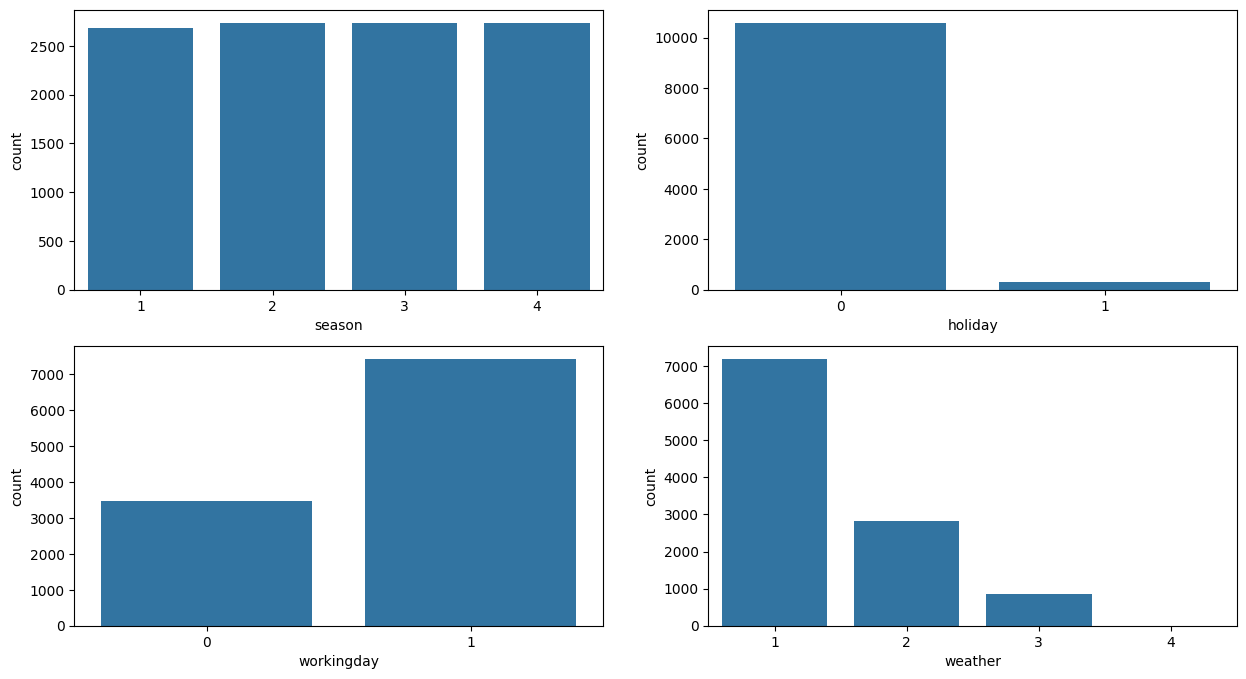

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
sns.countplot(data=df, x='season', ax=axs[0,0])
sns.countplot(data=df, x='holiday', ax=axs[0,1])
sns.countplot(data=df, x='workingday', ax=axs[1,0])
sns.countplot(data=df, x='weather', ax=axs[1,1])
plt.show()

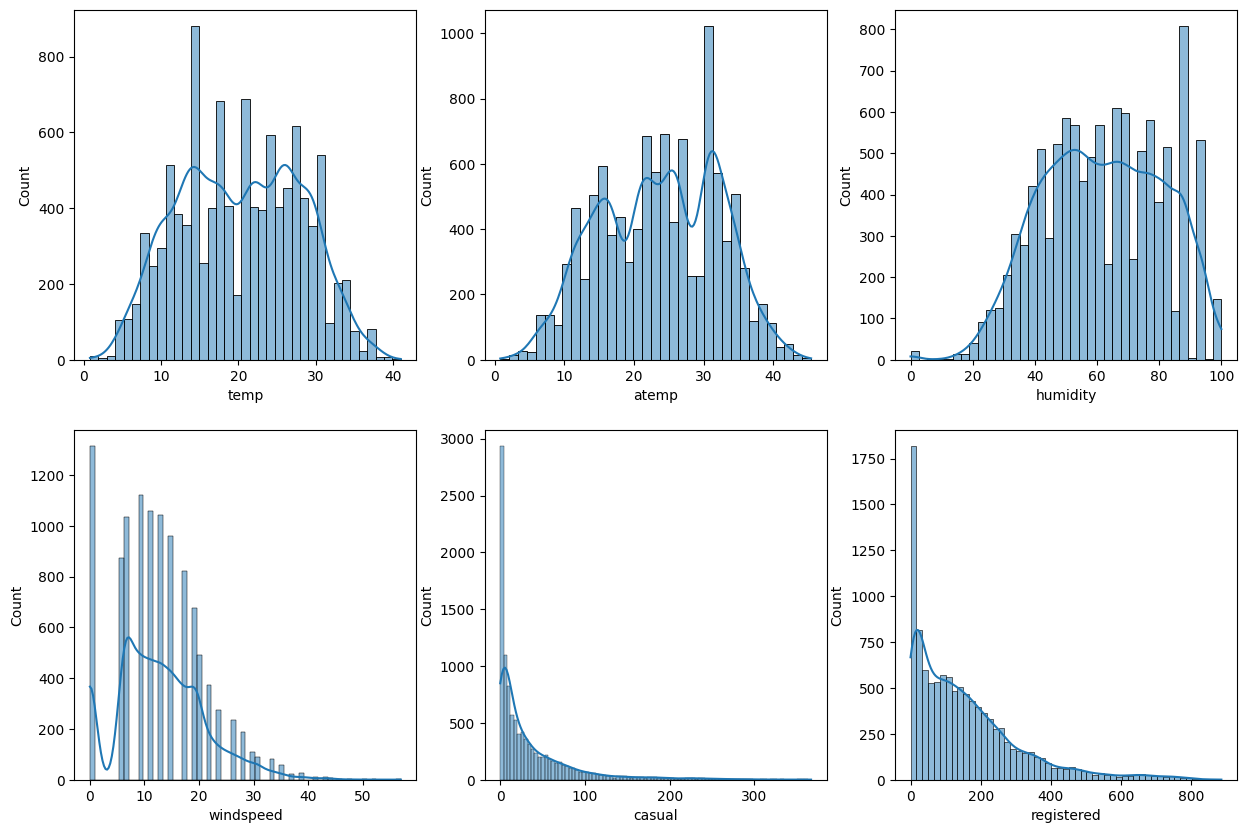

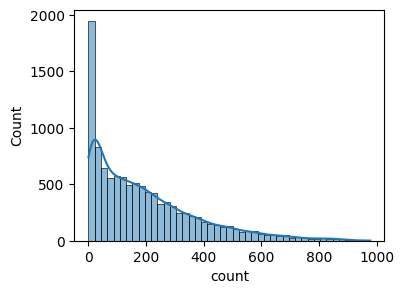

In [16]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10))
sns.histplot(data = df, x = 'temp',kde = True, ax = axs[0,0])
sns.histplot(data = df, x = 'atemp',kde = True, ax = axs[0,1])
sns.histplot(data = df, x = 'humidity',kde = True, ax = axs[0,2])
sns.histplot(data = df, x = 'windspeed',kde = True, ax = axs[1,0])
sns.histplot(data = df, x = 'casual',kde = True, ax = axs[1,1])
sns.histplot(data = df, x = 'registered',kde = True, ax = axs[1,2])
plt.show()

plt.figure(figsize = (4,3))
sns.histplot(data = df, x = 'count',kde = True)
plt.show()

## Outliers using Boxplot

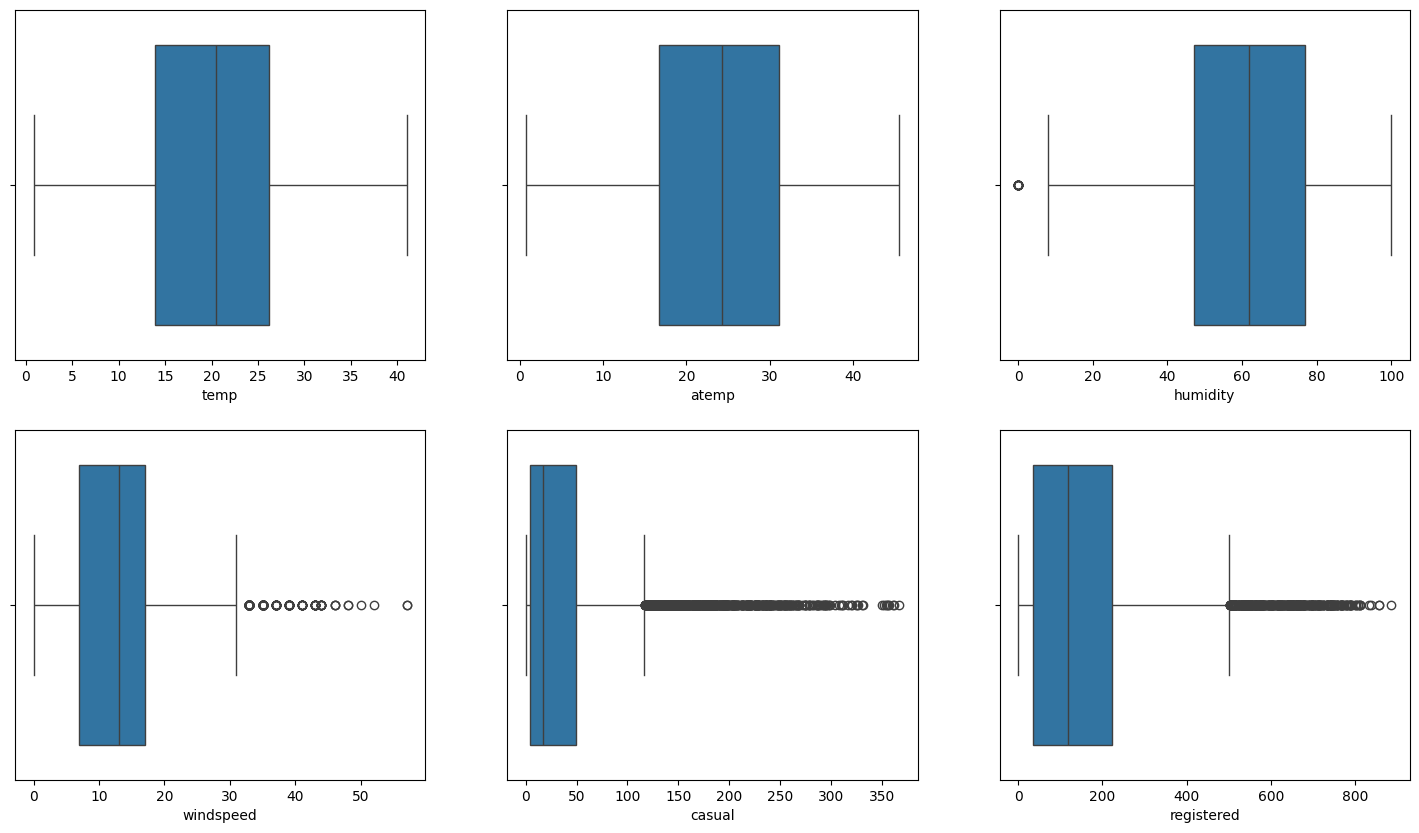

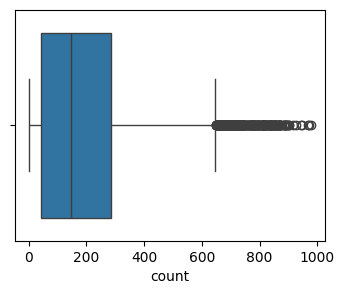

In [17]:
col=['temp','atemp','humidity','windspeed','casual','registered']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
cnt = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data = df, x = col[cnt], ax = axs[i,j])
        cnt += 1
plt.show()

plt.figure(figsize = (4,3))
sns.boxplot(data = df, x = 'count')
plt.show()

- For humidity columns using IQR Method

In [13]:
q1 = df['humidity'].quantile(0.25)
q3 = df['humidity'].quantile(0.75)
iqr = q3-q1
df[(df['humidity'] < q1 - 1.5*iqr) | (df['humidity'] > q3 + 1.5 * iqr)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


- For Windspeed columns using IQR Method

In [18]:
q1 = df['windspeed'].quantile(0.25)
q3 = df['windspeed'].quantile(0.75)
iqr = q3-q1
df[(df['windspeed'] < q1 - 1.5*iqr) | (df['windspeed'] > q3 + 1.5 * iqr)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
175,2011-01-08 14:00:00,1,0,0,1,8.20,8.335,32,32.9975,12,83,95,Q2
178,2011-01-08 17:00:00,1,0,0,1,6.56,6.060,37,36.9974,5,64,69,Q2
194,2011-01-09 09:00:00,1,0,0,1,4.92,3.790,46,35.0008,0,19,19,Q2
196,2011-01-09 11:00:00,1,0,0,1,6.56,6.060,40,35.0008,2,47,49,Q2
265,2011-01-12 12:00:00,1,0,1,1,8.20,7.575,47,39.0007,3,52,55,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10013,2012-11-02 14:00:00,4,0,1,2,16.40,20.455,40,32.9975,63,199,262,Q5
10154,2012-11-08 12:00:00,4,0,1,1,16.40,20.455,24,32.9975,33,202,235,Q5
10263,2012-11-13 01:00:00,4,0,1,3,18.04,21.970,88,43.0006,0,5,5,Q5
10540,2012-12-05 14:00:00,4,0,1,1,19.68,23.485,33,32.9975,39,179,218,Q5


- For casual columns using IQR Method

In [19]:
q1 = df['casual'].quantile(0.25)
q3 = df['casual'].quantile(0.75)
iqr = q3-q1
df[(df['casual'] < (q1 - 1.5*iqr)) | (df['casual'] > (q3 + 1.5 * iqr))]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
1173,2011-03-13 14:00:00,1,0,0,1,18.86,22.725,41,19.9995,144,106,250,Q2
1174,2011-03-13 15:00:00,1,0,0,1,19.68,23.485,39,22.0028,149,155,304,Q2
1175,2011-03-13 16:00:00,1,0,0,1,18.86,22.725,41,26.0027,124,132,256,Q2
1311,2011-03-19 12:00:00,1,0,0,1,18.86,22.725,33,27.9993,126,141,267,Q2
1312,2011-03-19 13:00:00,1,0,0,1,20.50,24.240,34,31.0009,174,127,301,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2012-12-08 12:00:00,4,0,0,2,16.40,20.455,87,15.0013,122,364,486,Q5
10611,2012-12-08 13:00:00,4,0,0,2,16.40,20.455,87,11.0014,148,399,547,Q5
10612,2012-12-08 14:00:00,4,0,0,2,16.40,20.455,87,19.0012,164,378,542,Q5
10613,2012-12-08 15:00:00,4,0,0,1,17.22,21.210,82,11.0014,167,374,541,Q5


- For registered columns using IQR Method

In [20]:
q1 = df['registered'].quantile(0.25)
q3 = df['registered'].quantile(0.75)
iqr = q3-q1
df[(df['registered'] < (q1 - 1.5*iqr)) | (df['registered'] > (q3 + 1.5 * iqr))]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
1987,2011-05-09 17:00:00,2,0,1,1,25.42,31.060,38,16.9979,59,539,598,Q3
2011,2011-05-10 17:00:00,2,0,1,1,26.24,31.060,33,0.0000,79,532,611,Q3
2059,2011-05-12 17:00:00,2,0,1,2,26.24,31.060,57,12.9980,54,540,594,Q3
2179,2011-05-17 17:00:00,2,0,1,1,25.42,30.305,65,27.9993,83,521,604,Q3
2371,2011-06-06 17:00:00,2,0,1,1,31.98,34.090,33,19.0012,63,516,579,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,572,Q5
10856,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,525,Q5
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678,Q5
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,Q5


- For count columns using IQR Method

In [21]:
q1 = df['count'].quantile(0.25)
q3 = df['count'].quantile(0.75)
iqr = q3-q1
df[(df['count'] < (q1 - 1.5*iqr)) | (df['count'] > (q3 + 1.5 * iqr))]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,Q2
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,Q2
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,Q2
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,Q2
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,Q5
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,Q5
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,Q5
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,Q5


## Relationship

In [22]:
data = df.copy()
data.drop('datetime', axis = 1, inplace  = True)

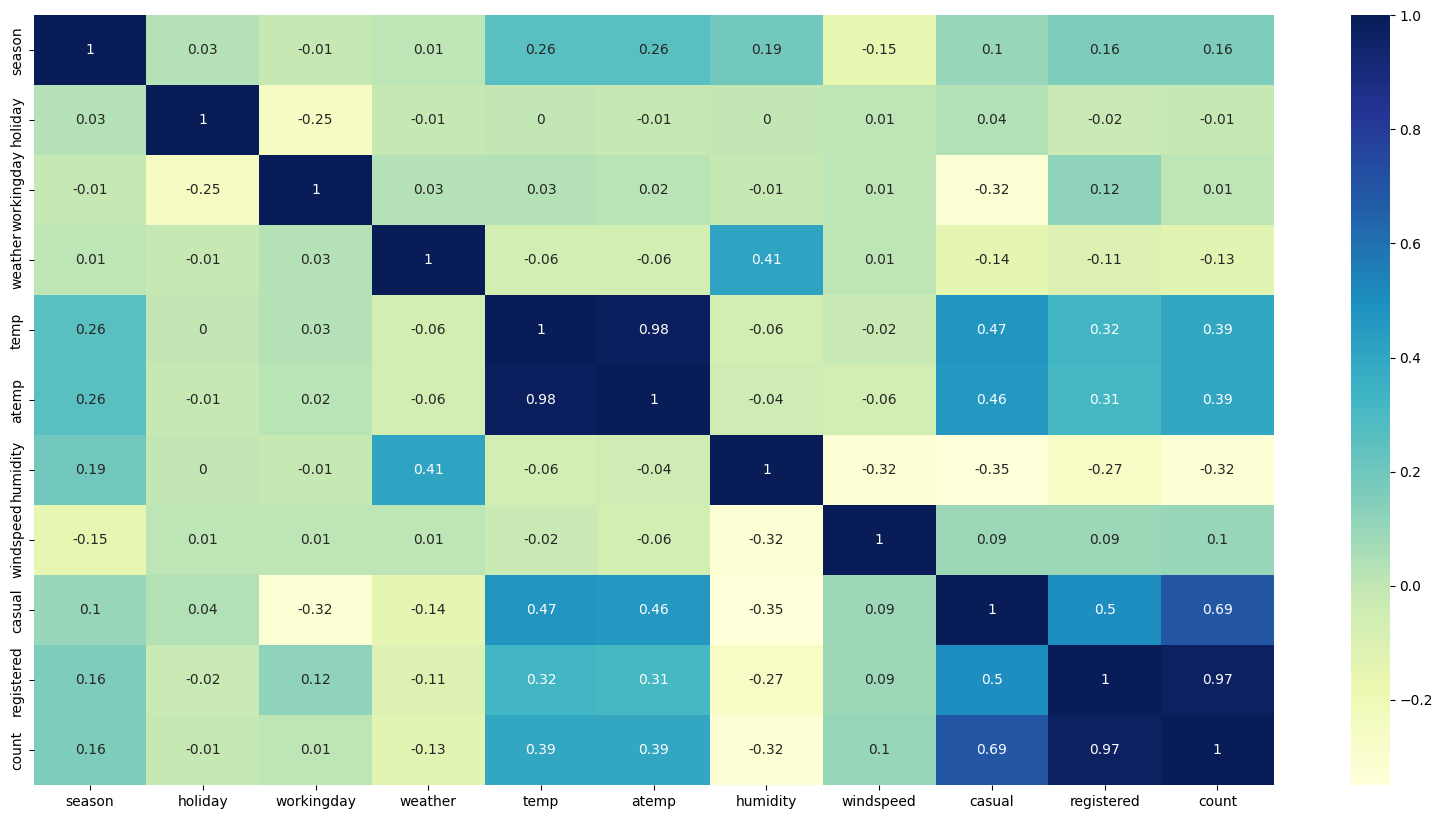

In [24]:
# Select only numeric columns for correlation
cor = data.select_dtypes(include=['number']).corr()

plt.figure(figsize=(20, 10))
sns.heatmap(cor.round(2), annot=True, cmap='YlGnBu')
plt.show()


- atemp and temp are positively correlated
- atemp and temp are also positively correlated with season
- humidity is positively correlated with weather
- humidity is negatively correlated with casual
- casual and count are positively correlated
- registered and count are positively correlated
- registered and humidity are negatively correlated

In [25]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,quarter
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Q2
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Q2
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Q2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Q2
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Q2


# Test 1
## No. of rides on weekdays and weekends

- H0: There is no significant difference in no. of rides in weekdays and weekends
- H1: There is significant difference in no. of rides in weekdays and weekends
- alpha = 0.05
- 2 Sample Independent T-Test

In [26]:
from scipy.stats import ttest_ind

In [27]:
weekend = df[df['workingday'] == 0]['count']
workingdays = df[df['workingday'] == 1]['count']

In [28]:
st, pval = ttest_ind(weekend, workingdays)
print('p-value: ', pval)
print('statistics value: ',st)
if pval < 0.05:
    print('Reject Null Hypothesis,There is significant difference in no. of rides in weekdays and weekends')
else:
    print('Failed to reject Null Hypothesis, There is no significant difference in no. of rides in weekdays and weekends')

p-value:  0.22644804226361348
statistics value:  -1.2096277376026694
Failed to reject Null Hypothesis, There is no significant difference in no. of rides in weekdays and weekends


# Test 2
## Demand of bicycle on rent for different weather condition

- H0: The demand of bicycle rent is same for different weather
- H1: The demand of bicycle rent is different for different weather
- alpha = 0.05
- Test: One Way Annova

## Checking annova assumptions
- Normality

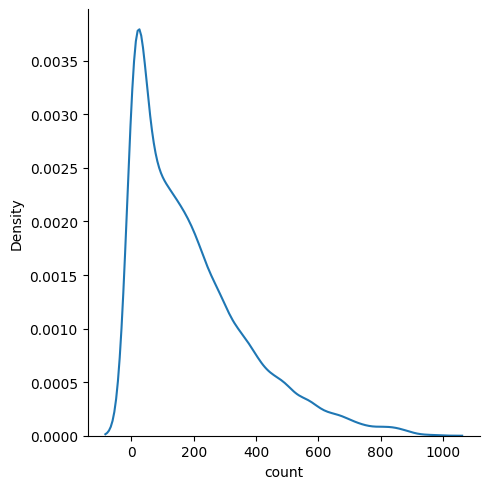

In [29]:
sns.displot(data = df, x = 'count', kind = 'kde')

In [30]:
df['count_z'] = (df['count'] - df['count'].mean())/df['count'].std()

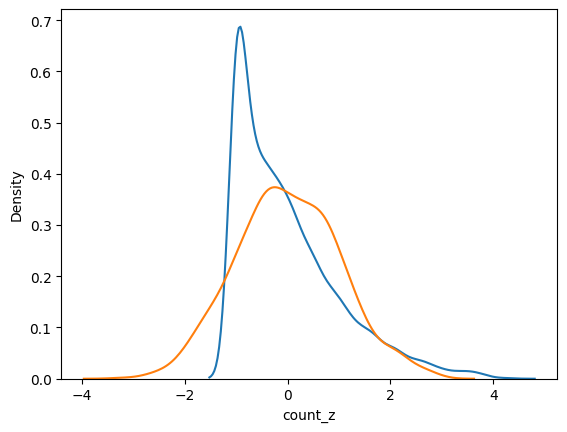

In [31]:
stz = np.random.normal(0,1,1000)
sns.distplot(df['count_z'], hist = False)
sns.distplot(stz, hist = False)
plt.show()

- They are not normally distribured

- Test for variance

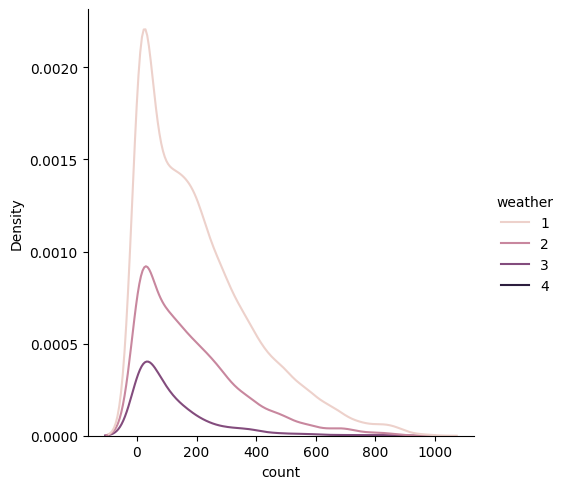

In [32]:
sns.displot(data = df, x = 'count', hue = 'weather', kind = 'kde' )

In [33]:
from scipy.stats import levene

In [34]:
w1 = df[df['weather'] == 1]['count']
w2 = df[df['weather'] == 2]['count']
w3 = df[df['weather'] == 3]['count']
w4 = df[df['weather'] == 4]['count']

In [35]:
s, pval = levene(w1,w2,w3,w4)

- H0: Variance is same
- H1: Varinace is different
- alpha = 0.05

In [36]:
if pval < 0.05:
    print('Reject Null Hypothesis, Variance is not same')
else:
    print('Failed to reject Null hypothesis, Variance is same')

Reject Null Hypothesis, Variance is not same


## Here the variance is not same according to the levene Test so we use Kruskal Test instead of one way annova

In [37]:
from scipy.stats import kruskal

In [38]:
s, pval = kruskal(w1,w2,w3,w4)

In [39]:
if pval < 0.05:
    print('Reject Null hypothesis, The demand of bicycle rent is different for different weather')
else:
    print('Failed to reject, The demand of bicycle rent is same for different weather')

Reject Null hypothesis, The demand of bicycle rent is different for different weather


# Test 3
## Demand of bicycle on rent in different season

- H0: The Demand of bicycle on rent is same in different season
- H1: The Demand of bicycle on rent is different in different season
- alpha = 0.05
- Test = One Way Annova

- Checking Assumptions of One way Annova
- Normality

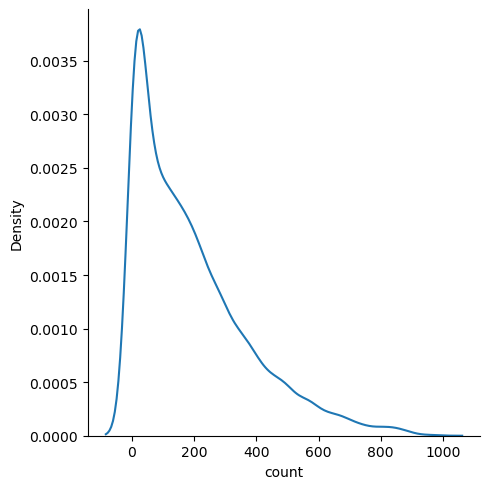

In [35]:
sns.displot(data = df, x = 'count', kind = 'kde')

In [36]:
df['count_z'] = (df['count'] - df['count'].mean())/df['count'].std()

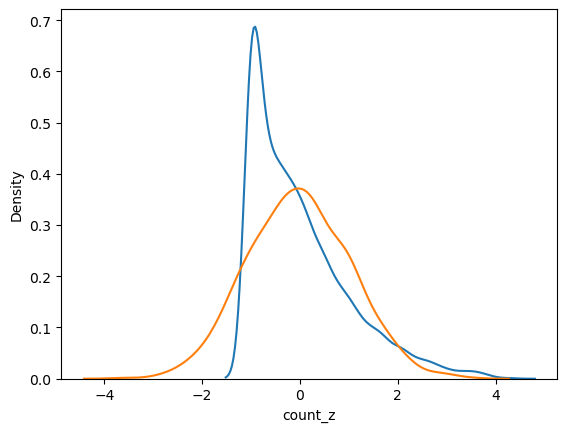

In [37]:
stz = np.random.normal(0,1,1000)
sns.distplot(df['count_z'], hist = False)
sns.distplot(stz, hist = False)
plt.show()

- They are not normally distributed

- Test for Variance

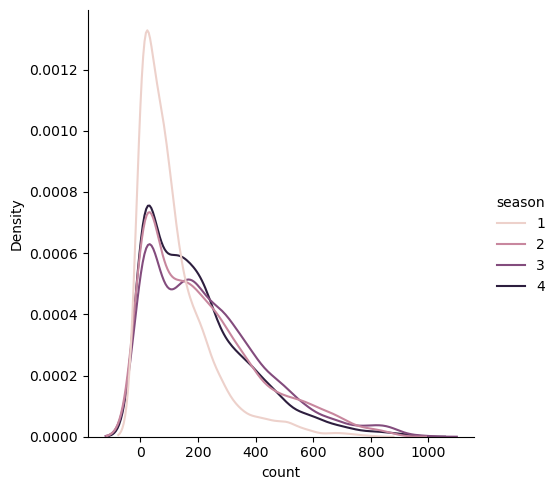

In [38]:
sns.displot(data = df, x = 'count', hue = 'season', kind = 'kde')

In [39]:
s1 = df[df['season'] == 1]['count']
s2 = df[df['season'] == 2]['count']
s3 = df[df['season'] == 3]['count']
s4 = df[df['season'] == 4]['count']

In [40]:
s, pval = levene(s1,s2,s3,s4)

- H0: Variance is same
- H1: Variance is different
- alpha = 0.05

In [41]:
if pval < 0.05:
    print('Reject Null Hypothesis, Variance is different')
else:
    print('Failed to reject Null Hypothesis, Variance is same')

Reject Null Hypothesis, Variance is different


## As the Assumption of one way annove is false we use Kruskal Wallis

In [42]:
s , pval = kruskal(s1,s2,s3,s4)

In [43]:
if pval < 0.05:
    print('Reject Null Hypothesis, The Demand of bicycle is different in different season')
else:
    print('Reject Null Hypothesis, The Demand of bicycle is same in different season')

Reject Null Hypothesis, The Demand of bicycle is different in different season


# Test 4
## Weather condition during different season

- H0: Weather condition are same during different season
- H1: Weather condition are significantly different during different season
- alpha = 0.05
- Test = Chi Square Test

In [44]:
cros = pd.crosstab(df['weather'], df['season'])
cros

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [45]:
from scipy.stats import chi2_contingency

In [46]:
s, pval, df,c = chi2_contingency(cros)

In [47]:
if pval < 0.05:
    print('Reject Null Hypothesis, Weather condition are significantly different during different season')
else:
    print('Failed to reject Null Hypothesis, Weather condition are same during different seasons')

Reject Null Hypothesis, Weather condition are significantly different during different season


# Analysis
- Bike ride frequency is consistent between weekends and weekdays.
- During winter, there is a notable decrease in the number of bike rides.
- Bike ride demand significantly rises during clear, cloudless weather compared to other conditions.
- Variations in bike ride demand are observed across different seasons and weather conditions.
- Demand decreases significantly when wind speeds exceed 35 km/hr.
- Demand also drops notably when the temperature falls below 10 degrees Celsius.

# Recommendation
- Increase bike inventory during summer and fall as demand peaks during these seasons compared to others.
- Working days versus non-working days do not significantly impact bike rentals based on a significance level of 0.05.
- Consider reducing bike availability on days with extremely low humidity, as demand tends to be lower during such conditions.
- Decrease bike availability during very cold days, particularly when the temperature drops below 10 degrees Celsius.
- Similarly, during thunderstorms or when wind speeds exceed 35 km/h, it is advisable to reduce the number of bikes available for rental due to decreased demand during such weather conditions.